Data for this analysis is obtained from.

https://data.gov.my/data-catalogue/hies_hies_state

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set_style("darkgrid")

In [3]:
household_income = pd.read_csv("household income and expenditure by states.csv", parse_dates=["date"])
household_income.head()

# Things to see from this dataset
# Plot bar graph for [income_mean, income_media, expenditure_mean, gini, poverty for every states]
# Take a look which state has the highest amount of each 



,date,state,income_mean,income_median,expenditure_mean,gini,poverty
0,2022-01-01,Johor,8517,6879,5342,0.36646,4.6
1,2022-01-01,Kedah,5550,4402,3765,0.35938,9.0
2,2022-01-01,Kelantan,4885,3614,3505,0.38540,13.2
3,2022-01-01,Melaka,8057,6210,5707,0.36963,4.2
4,2022-01-01,Negeri Sembilan,6788,5226,4678,0.36853,4.4


In [4]:
# set date to 2022 as this is annual data of 2022 
df_househld = household_income.copy()
df_househld["date"] = df_househld["date"].dt.year
df_househld.rename({"date":"year"}, inplace=True, axis=1)



'Putrajaya has the highest income mean by state, while Kelantan places the lowest.\nFactor such as number of population is not considered.\nHowerver it is well known in Malysia that most high income earners live in Putrajaya or Kuala Lumpur.'

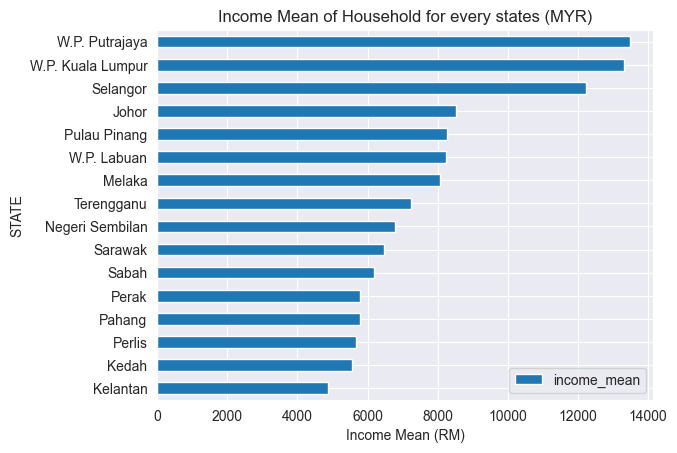

In [5]:
(df_househld
 .groupby(["state"])[["income_mean"]]
 .sum()
 .sort_values(by="income_mean", ascending=True)
 .plot.barh(
     title="Income Mean of Household for every states (MYR)",
     ylabel="STATE",
     xlabel="Income Mean (RM)"
 ))

"""Putrajaya has the highest income mean by state, while Kelantan places the lowest.
Factor such as number of population is not considered.
Howerver it is well known in Malysia that most high income earners live in Putrajaya or Kuala Lumpur."""

In [6]:
# Drop year as we already know this is from 2022
df_househld.drop(columns=["year"], axis=1, inplace=True)

In [7]:
# Set state as index for easier graph plotting
df_househld.set_index("state", inplace=True)

In [8]:
df_househld.head()

,income_mean,income_median,expenditure_mean,gini,poverty
state,,,,,
Johor,8517,6879,5342,0.36646,4.6
Kedah,5550,4402,3765,0.35938,9.0
Kelantan,4885,3614,3505,0.38540,13.2
Melaka,8057,6210,5707,0.36963,4.2
Negeri Sembilan,6788,5226,4678,0.36853,4.4


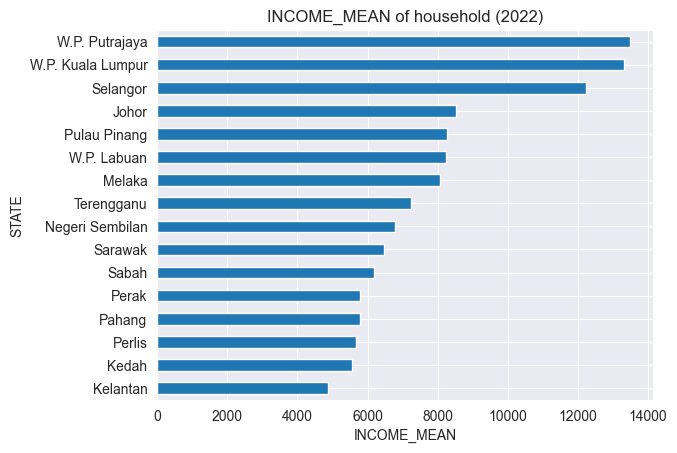

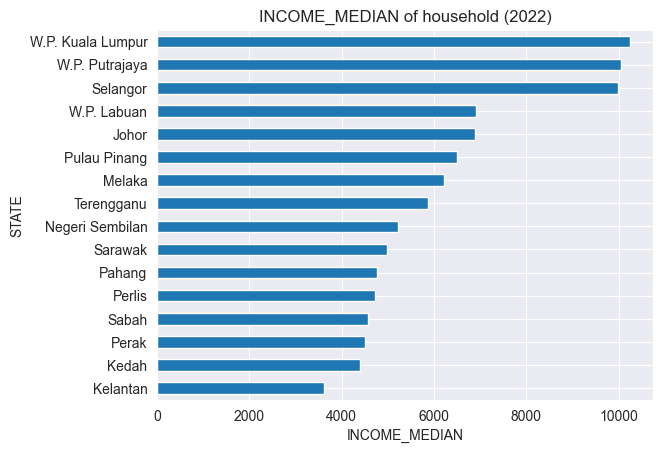

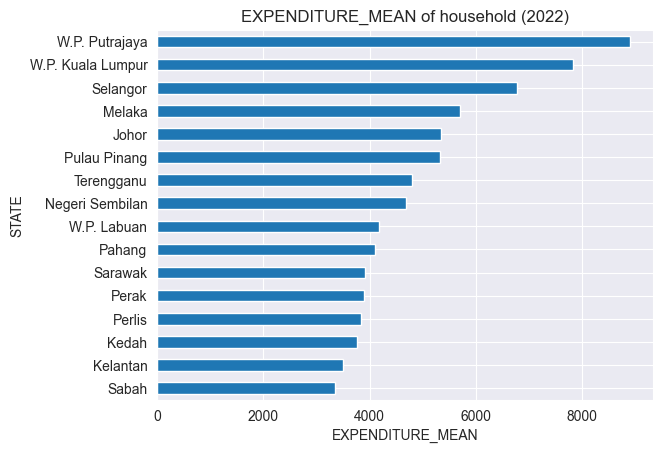

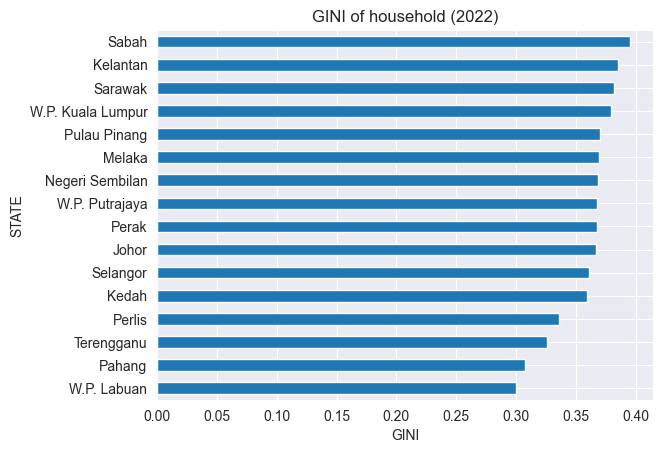

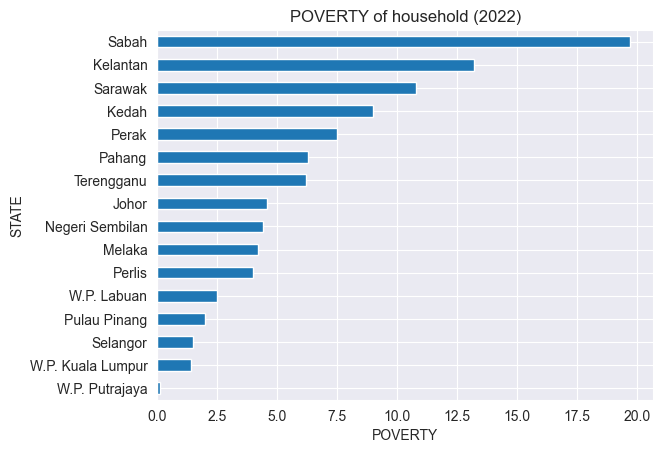

In [9]:
# Create a bar graph function for every columns to each state

def plot_graph_bar(df):
    for column in df.columns:
        df[column].sort_values().plot.barh(
            title=f"{column.upper()} of household (2022)",
            ylabel = "STATE",
            xlabel = column.upper()
        )
        plt.show()

plot_graph_bar(df_househld)

In [10]:
df_househld.head()

,income_mean,income_median,expenditure_mean,gini,poverty
state,,,,,
Johor,8517,6879,5342,0.36646,4.6
Kedah,5550,4402,3765,0.35938,9.0
Kelantan,4885,3614,3505,0.38540,13.2
Melaka,8057,6210,5707,0.36963,4.2
Negeri Sembilan,6788,5226,4678,0.36853,4.4


In [11]:
states_idx = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [12]:
df_househld["state_id"] = np.array(states_idx)

In [13]:
df_househld

,income_mean,income_median,expenditure_mean,gini,poverty,state_id
state,,,,,,
Johor,8517,6879,5342,0.36646,4.6,1
Kedah,5550,4402,3765,0.35938,9.0,2
Kelantan,4885,3614,3505,0.38540,13.2,3
Melaka,8057,6210,5707,0.36963,4.2,4
Negeri Sembilan,6788,5226,4678,0.36853,4.4,5
Pahang,5777,4753,4107,0.30770,6.3,6
Pulau Pinang,8267,6502,5322,0.37058,2.0,7
Perak,5779,4494,3903,0.36769,7.5,8
Perlis,5664,4713,3834,0.33589,4.0,9


id :1 state :Johor
id :2 state :Kedah
id :3 state :Kelantan
id :4 state :Melaka
id :5 state :Negeri Sembilan
id :6 state :Pahang
id :7 state :Pulau Pinang
id :8 state :Perak
id :9 state :Perlis
id :10 state :Selangor
id :11 state :Terengganu
id :12 state :Sabah
id :13 state :Sarawak
id :14 state :W.P. Kuala Lumpur
id :15 state :W.P. Labuan
id :16 state :W.P. Putrajaya


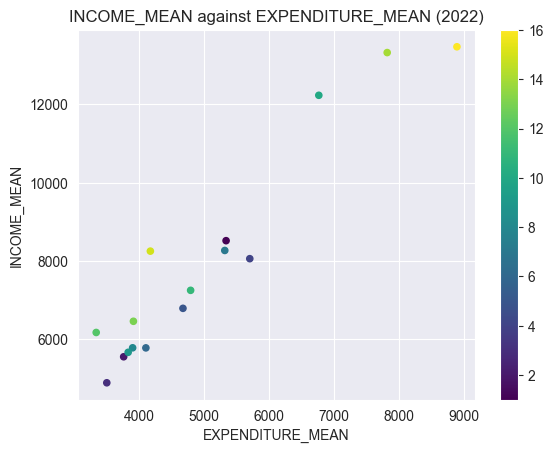

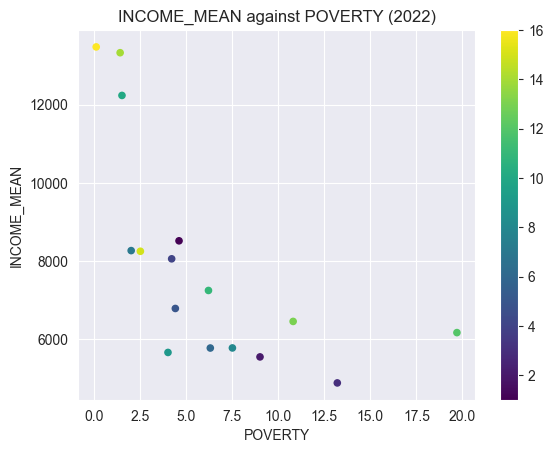

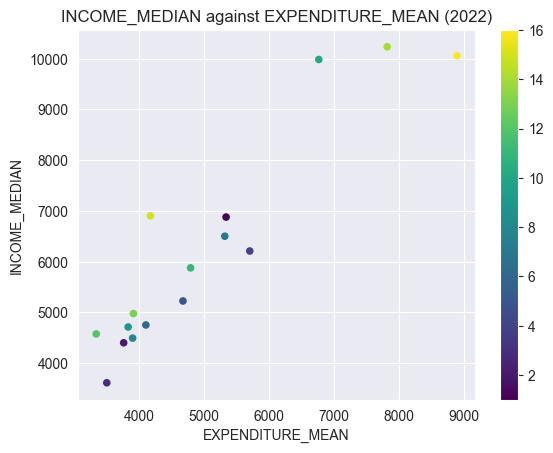

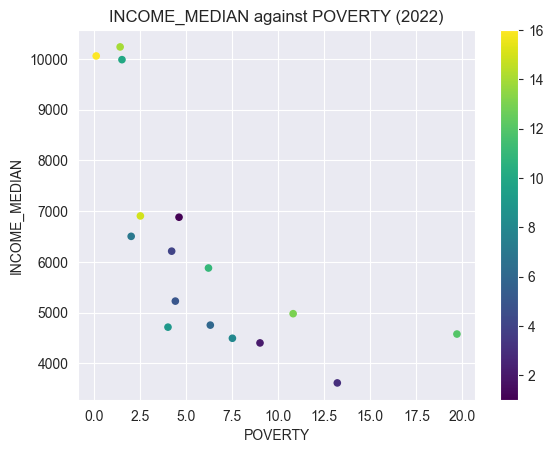

In [30]:
# Household with higher income will spend more. Let see if this dataset says so or not.
# Create relation between income and expenditure and poverty

def plot_graph_scatter(df):
    y_axis = ["income_mean", "income_median"]
    x_axis = ["expenditure_mean", "poverty"]
    for y_column in y_axis:
        for x_column in x_axis:
            df.plot.scatter(
                x=x_column,
                y=y_column,
                ylabel = y_column.upper(),
                xlabel= x_column.upper(),
                title=f"{y_column.upper()} against {x_column.upper()} (2022)",
                c=df["state_id"],
                colormap='viridis',
            )

plot_graph_scatter(df_househld)

state_identity = dict(zip(states_idx, df_househld.index))
for k,v in state_identity.items():
    print(f"id :{k} state :{v}")

        


In [17]:
# It is proven that higher income leads to higher expenses. 
# However, income vs poverty graphs are a little bit ambigous. Their relation are not a beautiful indirectly proportional
# One thing can be considered is that, rate of income to expenditure; percentage of income used for expenditure


In [ ]:
df_househld["expenditure_rate_mean"] = df_househld["expenditure_mean"] / df_househld["income_mean"]
df_househld["expenditure_rate_median"] = df_househld["expenditure_mean"] / df_househld["income_median"]
df_househld.head()

,income_mean,income_median,expenditure_mean,gini,poverty,state_id,expenditure_rate_mean,expenditure_rate_median
state,,,,,,,,
Johor,8517,6879,5342,0.36646,4.6,1,0.627216,0.776566
Kedah,5550,4402,3765,0.35938,9.0,2,0.678378,0.855293
Kelantan,4885,3614,3505,0.38540,13.2,3,0.717503,0.969840
Melaka,8057,6210,5707,0.36963,4.2,4,0.708328,0.919002
Negeri Sembilan,6788,5226,4678,0.36853,4.4,5,0.689157,0.895140


<AxesSubplot: xlabel='% of expenditure from income', ylabel='STATE'>

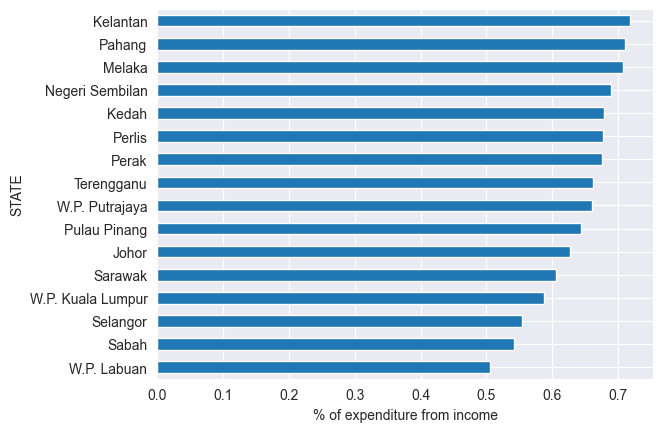

In [ ]:
#Let see which state use the most of theier income for expenditure
df_househld["expenditure_rate_mean"].sort_values().plot.barh(xlabel="% of expenditure from income", ylabel="STATE")

# Regardless of being in lower income group, Kelantan seems to spend most of their income for expenditure
# What makes people in Kelantan spend a lot from their Income ? 

<AxesSubplot: xlabel='expenditure_rate_mean', ylabel='poverty'>

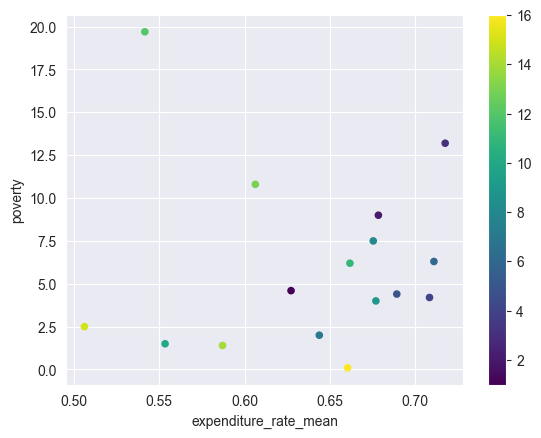

In [ ]:
df_househld.plot.scatter(
    x="expenditure_rate_mean",
    y="poverty",
    c=df_househld.state_id,
    colormap='viridis'
    
)

# Looks like the rate of expenditure spend from income does not really affect the poverty index of each state.

In [ ]:
df_househld.loc[:, ["poverty", "income_mean","expenditure_mean", "expenditure_rate_mean"]].sort_values(ascending=False, by="poverty")

,poverty,income_mean,expenditure_mean,expenditure_rate_mean
state,,,,
Sabah,19.7,6171,3342,0.541565
Kelantan,13.2,4885,3505,0.717503
Sarawak,10.8,6457,3915,0.606319
Kedah,9.0,5550,3765,0.678378
Perak,7.5,5779,3903,0.675376
Pahang,6.3,5777,4107,0.710923
Terengganu,6.2,7248,4796,0.661700
Johor,4.6,8517,5342,0.627216
Negeri Sembilan,4.4,6788,4678,0.689157
